<a href="https://colab.research.google.com/github/spros1/HeartFailureAnalysis/blob/main/ExcerA_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##*## Subject 1 ## Import data from kaggle and load them to a dataframe*

In [1]:
pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sprospap","key":"9a4854805a9655a32d9fa00b6ca4aa15"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 7.12MB/s]


In [6]:
ls

heart-failure-clinical-data.zip  kaggle.json  sample_data/


In [7]:
! unzip heart-failure-clinical-data.zip

Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [8]:
# Check dataset 
import pandas as pd
from google.colab import files
with open('heart_failure_clinical_records_dataset.csv', 'r') as data:
    df3 = pd.read_csv(data, encoding = ('ansi'))
    print (df3)

      age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]


### Create an instance of Database and load to table the CSV

In [9]:
# create the SQLite Database
%pip install csv-to-sqlite

In [10]:
# import to table 
!csv-to-sqlite -f heart_failure_clinical_records_dataset.csv -t full -o db.sqlite

Written 299 rows into 1 tables in 0.017 seconds


### Accessing Database - Copy data to dataframe


In [11]:
#Accessing the SQL Database
import sqlite3

In [12]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [13]:
conn = create_connection("db.sqlite")

In [14]:
import pandas as pd 

cur = conn.cursor()
cur.execute(f"SELECT * FROM heart_failure_clinical_records_dataset " )
df = pd.DataFrame(cur.fetchall(), columns= [ 'Age', 'Anaemia', 'Creatinine_Phosphokinase', 'Diabetes', 'Ejection_Fraction', 'High_Blood_Pressure', 'Platelets', 'Serum_creatinine', 'Serum_Sodium', 'Sex', 'Smoking', 'Time', 'Death_Event'] )

print(df)

      Age  Anaemia  Creatinine_Phosphokinase  ...  Smoking  Time  Death_Event
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]


##*## Subject 2 ## Check and clean the data*

We now have the data based in SQLite, and the dataframe df is ready to used for calculation in python

In [78]:
df.head()

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_creatinine,Serum_Sodium,Sex,Smoking,Time,Death_Event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       299 non-null    float64
 1   Anaemia                   299 non-null    int64  
 2   Creatinine_Phosphokinase  299 non-null    int64  
 3   Diabetes                  299 non-null    int64  
 4   Ejection_Fraction         299 non-null    int64  
 5   High_Blood_Pressure       299 non-null    int64  
 6   Platelets                 299 non-null    float64
 7   Serum_creatinine          299 non-null    float64
 8   Serum_Sodium              299 non-null    int64  
 9   Sex                       299 non-null    int64  
 10  Smoking                   299 non-null    int64  
 11  Time                      299 non-null    int64  
 12  Death_Event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [80]:
# search for missing values -- no missing values
df.isnull().sum()

Age                         0
Anaemia                     0
Creatinine_Phosphokinase    0
Diabetes                    0
Ejection_Fraction           0
High_Blood_Pressure         0
Platelets                   0
Serum_creatinine            0
Serum_Sodium                0
Sex                         0
Smoking                     0
Time                        0
Death_Event                 0
dtype: int64

In [81]:
# ckeck statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
Anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
Creatinine_Phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
Diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
Ejection_Fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
High_Blood_Pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
Platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
Serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
Serum_Sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
Sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


As we saw it is an ideal dataset :
*   All the values are numeric
*   There are no null values to impute
*   No duplicate values

Now lets proceed to some visualization

In [82]:
## import for visuals
import matplotlib.pyplot as plt
import seaborn as sns

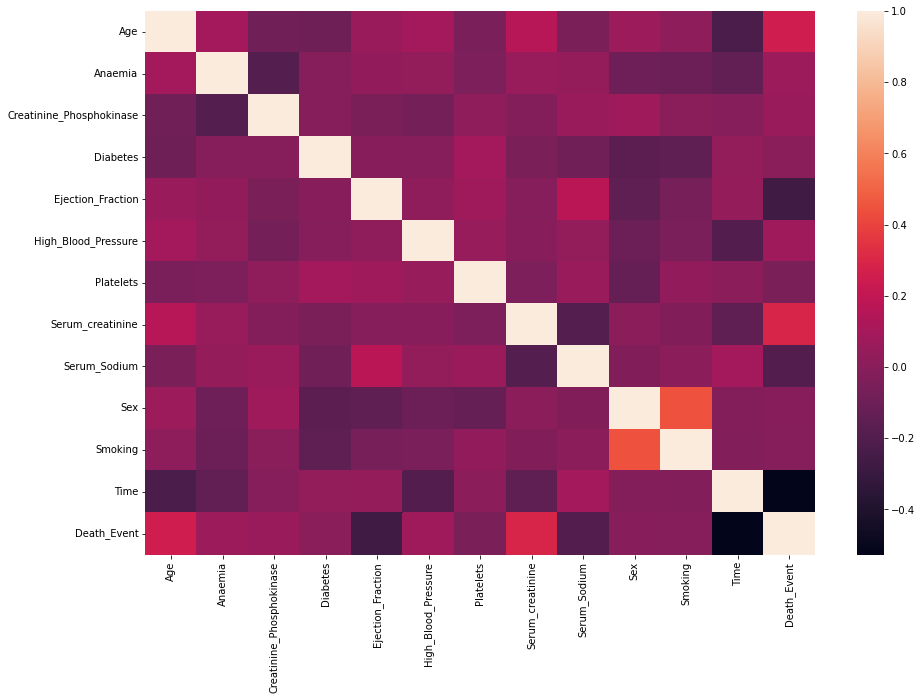

In [83]:
## heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

Conclusions from the heatmap :


*   Death event looks to be highly correlated with serum_creatinine and age
*   Survival event looks to be highly correlated with time, ejection_fraction, serum_sodium
*   Sex and smoking have the least correlation with DEATH_EVENT

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

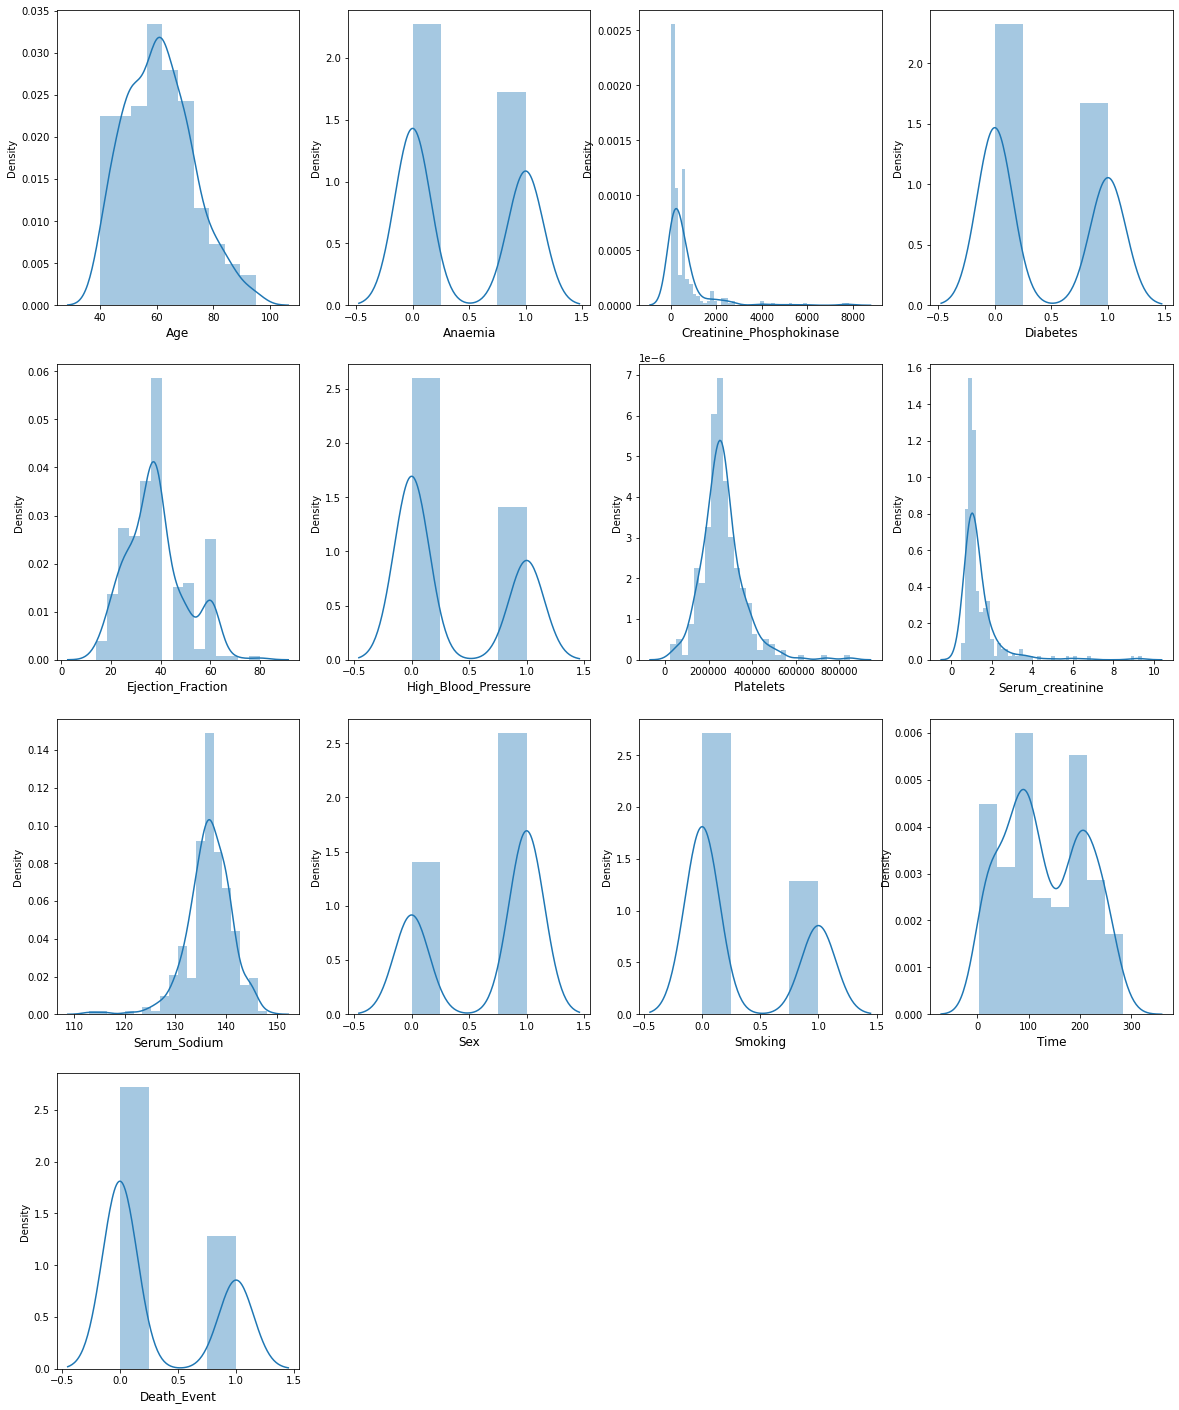

In [67]:
## In order to understand better how all the features are distributed we are going to distplot them
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df:
    if feature_num <= 13:
        ax = plt.subplot(4, 4, feature_num)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

Conclusions from the distplot :
There is a notable skew in certain features like platelets, creatinine_phosphokinase but will skip the same as these features seem to have less impact on survival as we will see below

###No problem found in dataset so we can proceed with the calculations

##*## Subject 3 ## Perform method Random Forest to check the results of the paper*



In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [137]:
# delete time feature to be the same with method in paper
df_without_time = df.drop(columns='Time')

# create 
x = df_without_time.drop(columns='Death_Event')
y = df_without_time['Death_Event']

###Feature Importance
Feature importance is a procedure to assign scores to features to indicate the relative importance of each feature when building a model. The scores provide insight into the dataset, telling us which features are the most or the least relevant. After building the model, we use feature_importances_ to view the relative importance scores of each feature. We can interpret from the bar chart below that **Serum Creatinine** is the most importance feature in prediction.

In [138]:
# run random forest method
model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.14499807 0.0214763  0.12714551 0.02521435 0.17561151 0.0208587
 0.12261326 0.20871951 0.10847058 0.02370885 0.02118335]


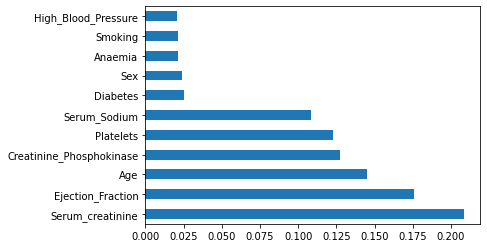

In [139]:
# results in visual
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh')
plt.show()

Text(0.5, 1.0, 'Feature Importances')

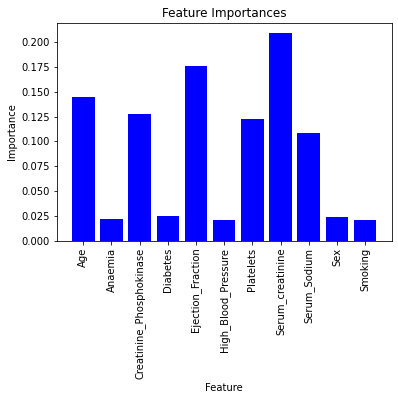

In [140]:
## and in similar visual
importances = list(model.feature_importances_)
scaled_data_col_name = list(x.columns.to_numpy())

plt.bar(scaled_data_col_name , importances, color='blue')
plt.xticks(ticks = scaled_data_col_name, labels = scaled_data_col_name, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')


###Now lets create the accuracy score

In [141]:
# Create the frames for the method random forest
inp_data = df_without_time.drop(columns='Death_Event')
out_data = df_without_time[['Death_Event']]

In [142]:
def result(clf, inp1 ,out1 ):

## split to 70 - 30 % as the paper
    X_train, X_test, y_train, y_test = train_test_split(inp1, out1, test_size=0.3, random_state=0)

## Applying Transformer
    sc      = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test  = sc.fit_transform(X_test)

    print("-> Number of split train and test : \n")
    print("  X_train Shape : ", X_train.shape)
    print("  X_test Shape  : ", X_test.shape)
    print("  y_train Shape : ", y_train.shape)
    print("  y_test Shape  : ", y_test.shape , "\n")

## Fit and predict values  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

## Print Scores   
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy  = clf.score(X_test, y_test)
    cv_accuracy    = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    #accuracies.append([d, train_accuracy, test_accuracy, cv_accuracy])

    print('->Final print scores :\n')
    print('  Train Accuracy Score %.4f  ' % train_accuracy )
    print('  Test Accuracy Score  %.4f  '% test_accuracy  )
    print('  cv_accuracy Score %.4f     ' % cv_accuracy )

In [143]:
## run random forest and print scores 
clf = RandomForestClassifier(random_state=0)
result(clf,inp_data,out_data)

-> Number of split train and test : 

  X_train Shape :  (209, 11)
  X_test Shape  :  (90, 11)
  y_train Shape :  (209, 1)
  y_test Shape  :  (90, 1) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

->Final print scores :

  Train Accuracy Score 1.0000  
  Test Accuracy Score  0.7444  
  cv_accuracy Score 0.7177     


We successfully reproduced the method of Random Forest as the paper with Accuracy Score equal to 0.74

To go further we will perform a loop of 100 times to find the mean and best accuracy of thoses cases

In [144]:
## Create funtion to find best and mean accuracy over 100 loops
def best_mean_result(clf, inp1, out1, n_estimators = 100, max_features ='auto', max_depth = None, min_samples_split=11 ):    
    
    scores = [] 
    for i in range(0,100): # 100 samples
        n_estimators, max_features, max_depth, min_samples_split
        X_train, X_test, y_train, y_test = train_test_split(inp1, out1, test_size=0.3)
        clf = RandomForestClassifier(n_estimators      = n_estimators,
                                     max_features      = max_features,
                                     max_depth         = max_depth,
                                     min_samples_split = min_samples_split) 
        
        sc      = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test  = sc.fit_transform(X_test)
        clf.fit(X_train, y_train)
        scores.append(accuracy_score(clf.predict(X_test), y_test)) 

    plt.hist(scores)
    plt.show()
    print("Best Score: {}\nMean Score: {}".format(np.max(scores), np.mean(scores)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/loc

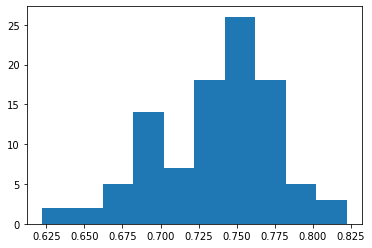

Best Score: 0.8222222222222222
Mean Score: 0.7348888888888888


In [145]:
## run best mean for random forest
best_mean_result(clf, inp_data, out_data)

##*## Subject 4 ## Perform PCA to reduce the features and after that implement method Random Forest to check the results*
Apply PCA on the continuous variables to get better visualizations. We use PCA to reduce the dimensionality of the dataset. PCA accomplishes this by capturing the variance in the dataset. It gets the components in such a way that they are in the direction of the highest variance

In [146]:
## imports for running pca part
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

In [147]:
## In order to perforfm PCA method , we seperate the features to continious and categorical 
cont_cols = ['Creatinine_Phosphokinase', 'Platelets','Serum_creatinine', 'Serum_Sodium', 'Ejection_Fraction','Age']
cat_vars = ['Anaemia', 'Diabetes', 'High_Blood_Pressure', 'Sex', 'Smoking','Death_Event']

In [148]:
# find min max value for continious features and create a unified dataframe with continious features using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_without_time[['Creatinine_Phosphokinase', 'Platelets','Serum_creatinine', 'Serum_Sodium', 'Ejection_Fraction','Age']])
scaled_df = df_without_time.copy()
scaled_df[cont_cols] = scaled_features
scaled_df.head()

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_creatinine,Serum_Sodium,Sex,Smoking,Death_Event
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,1


In [149]:
## now perform the PCA
pca_data = scaled_df.drop(columns='Death_Event')
pca1 = PCA()
pca1.fit(pca_data)

PCA()

In [150]:
## set score to 0.95 and fit to find how many features it is best to keep
pca95 = PCA(n_components=0.95)
pca95.fit_transform(pca_data).shape

(299, 7)

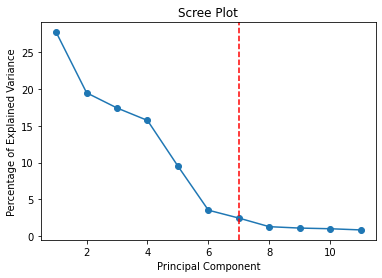

In [151]:
## Plot the variance of the new calculated features from PCA
percentage_variance = np.round(pca1.explained_variance_ratio_ * 100, decimals=2)
xlabels = ['PC' + str(x) for x in range(1, len(percentage_variance)+1)]

plt.plot(range(1,len(percentage_variance)+1), percentage_variance, '-o')
plt.axvline(x=7, color='red', linestyle='--')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

As we can see from the previous diagram, from component number 7 and after the variance does not change significantly, so we must keep the range of components 1-7.

However, it is much simpler to indicate the ratio of variance, between 0.0 to 1.0, that we want to preserve. In this experiment, we want to preserve 95% of the dataset's variance, so we define n_components=0.95. After transformation, the dimensionality has been reduced from 12 to 7 components.

Now let see in a visual way the contribution of the original features at the new corresponding Principal Components Features :

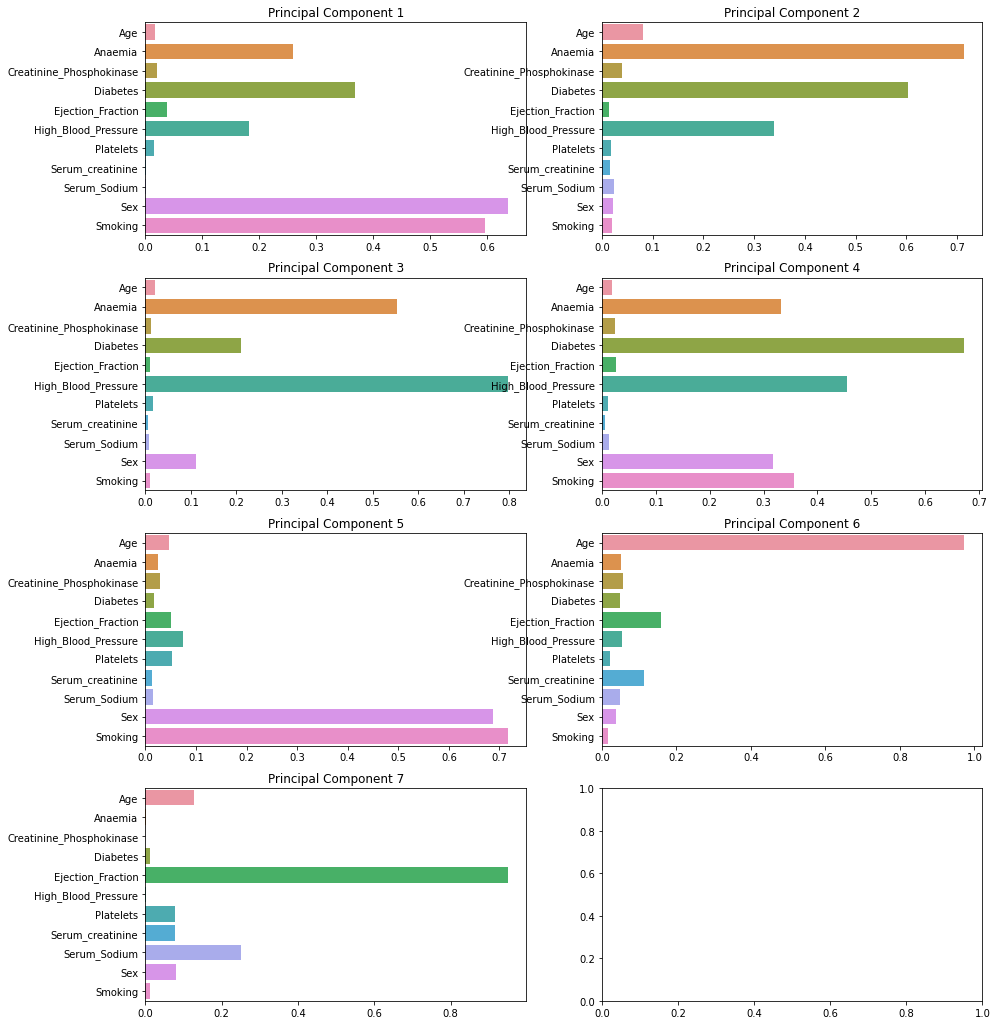

In [152]:
## create visuals for the seven new componenets of PCA about the contribution of the initial features
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))

row = -1; col = 0
for i in range(0,7):
    
    if(i%2 == 0): 
        col = 0
        row = row + 1
    else: 
        col=1
    
    sns.barplot(x=abs(pca1.components_[i]), y=pca_data.columns, orient='h', ax=ax[row][col])
    ax[row][col].set_title('Principal Component ' + str(i+1))

Last we will implement again the method of Random Forest but now on the features calculated from PCA. As we will see the accuracy of Random Forest model decrease after PCA is applied and same goes with best and mean score after 100 runs  :  

> Test Accuracy

*   Before PCA : 0.744
*   After  PCA : 0.722 

> Best Accuracy

*   Before PCA : 0.822
*   After  PCA : 0.811

> Mean Accuracy

*   Before PCA : 0.736
*   After  PCA : 0.732

In [153]:
# perform pca and run random_forest
pca95_rf = PCA(n_components=0.95)
X_train_reduced_rf = pca95_rf.fit_transform(pca_data)

clf_pca = RandomForestClassifier(random_state=0)
result(clf_pca,X_train_reduced_rf, out_data )


-> Number of split train and test : 

  X_train Shape :  (209, 7)
  X_test Shape  :  (90, 7)
  y_train Shape :  (209, 1)
  y_test Shape  :  (90, 1) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

->Final print scores :

  Train Accuracy Score 1.0000  
  Test Accuracy Score  0.7222  
  cv_accuracy Score 0.7271     


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/loc

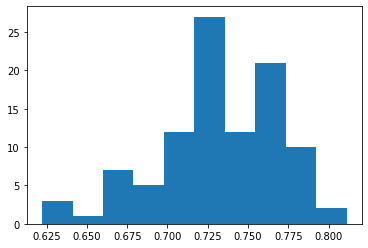

Best Score: 0.8111111111111111
Mean Score: 0.732


In [155]:
## run best mean for random forest after pca
best_mean_result(clf_pca,X_train_reduced_rf, out_data )

From this experiment, we can conclude that reducing the dimensionality of the dataset does not always perform a better result than using all dimensions.

##*## Subject 5 ## Compare variance of initial features with those that produced from PCA*

In [ ]:
# pending